In [1]:
#!pip install aicspylibczi

In [2]:
#!pip install czifile

In [3]:
#!pip install cellpose[gui]

In [ ]:
#!pip install ffmpeg-python

In [1]:
from aicspylibczi import CziFile
import czifile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
import os
import imageio
import ffmpeg
import time
import pandas as pd
from cellpose import io, models

In [2]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [3]:
plt.rcParams['animation.ffmpeg_path']

'ffmpeg'

In [10]:
%matplotlib inline

In [3]:
!python --version

Python 3.9.19


## If loading from bucket

In [3]:
from google.cloud import storage

# Create a storage client.
storage_client = storage.Client(project='jal2340-applied-cv-s24')

# Specify the name of your GCS bucket and the object (file) to download.
bucket_name = '3d-dicty-data'

bucket = storage_client.bucket(bucket_name)

In [4]:
# exp is experiment/ collection dates
exp_dates = ['2023-01-30', '2023-10-25']
blobs = {
    exp_dates[0] : {"MIP" : [], "raw": [], "processed":[]},
    exp_dates[1] : dict(raw=[], MIP=[], smiley=[]),
}
for blob in bucket.list_blobs():
  if(exp_dates[0] in blob.name):
    if('MIP.czi' in blob.name):
      blobs[exp_dates[0]]["MIP"].append(blob)
    elif("processed.czi" in blob.name):
      blobs[exp_dates[0]]["processed"].append(blob)
    else:
      blobs[exp_dates[0]]["raw"].append(blob)
  elif(exp_dates[1] in blob.name):
    if('MIP.czi' in blob.name):
      blobs[exp_dates[1]]["MIP"].append(blob)
    elif("smiley.czi" in blob.name):
      blobs[exp_dates[1]]["smiley"].append(blob)
    else:
      blobs[exp_dates[1]]["raw"].append(blob)

In [6]:
blobs

{'2023-01-30': {'MIP': [<Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-01_MIP.czi, 1710358500008774>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-02_MIP.czi, 1710358537771887>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-03_MIP.czi, 1710358751673597>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-04_MIP.czi, 1710358795150245>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-05_MIP.czi, 1710358946480650>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-06_MIP.czi, 1710361694382886>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-07_MIP.czi, 1710366852425136>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-08_MIP.czi, 1710367004956447>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-09_MIP.czi, 1710369513010511>],
  'raw': [<Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-01.czi, 1710358579678619>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_factin_pip3-02.czi, 1710358536343239>,
   <Blob: 3d-dicty-data, 2023-01-30/dicty_fa

In [7]:
# index is which video choosing (6th one, etc)

def get_image(vid_index, date=0, group='processed', blobs=blobs):
  blob = blobs[exp_dates[date]][group][vid_index]
  fname = blob.name.split('/')[-1] # ignore date/fname
  print(f"Loading {fname}")
  blob.download_to_filename(fname)
  return(CziFile(fname))

In [13]:
blob = blobs[exp_dates[0]]['processed'][5]
blob.size / (1024 * 1024 * 1024) # size in GB

99.62492406368256

In [14]:
chunk_size=10*1024*1024

In [13]:
#start = 0
#end = min(start + chunk_size, blob.size)
#print(f"Loading {start} to {end}")
#blob.download_as_string(start=start, end=end)

In [14]:
# Read the blob in chunks

#start = 0
#while start < blob_size:
#    end = min(start + chunk_size, blob_size)
#    chunk = blob.download_as_string(start=start, end=end)
#    process_czi_chunk(chunk)
#    start = end

In [15]:
def process_czi_chunk(chunk):
    # Process the chunk as needed
    pass

def load_czi_from_gcs(bucket_name, blob_name, chunk_size=10*1024*1024):  # Chunk size: 10 MB
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(blob_name)

    # Get the total size of the blob
    blob_size = blob.size

    # Read the blob in chunks
    start = 0
    while start < blob_size:
        end = min(start + chunk_size, blob_size)
        chunk = blob.download_as_string(start=start, end=end)
        process_czi_chunk(chunk)
        start = end

# Example usage:
#bucket_name = 'your_bucket_name'
#blob_name = 'path/to/your/czi/video/file.czi'
#load_czi_from_gcs(bucket_name, blob_name)

In [17]:
img = get_image(5, 0, 'processed')
# TODO: Understand each dimension in the shape
# shape is Channels x num_slices x H x W.
# S is "Scene" - different POV or regions
# not a video ??
img.get_dims_shape()

Loading dicty_factin_pip3-06_processed.czi


KeyboardInterrupt: 

In [ ]:
!ls

## EDA for Czi Video

Using [aicspylibczi](https://allencellmodeling.github.io/aicspylibczi/)

In [4]:
os.listdir()

['ffmpeg',
 '3D_OF_LK_threaded.ipynb',
 'setup_paths.sh',
 'Bounding_Boxes.ipynb',
 'README.md',
 '3DCT_Examples',
 'Bounding_Boxes(1).ipynb',
 '.gitignore',
 'Setting Up GCP VM-1.pdf',
 'torch_datasets',
 'VideoProcessing.ipynb',
 '.ipynb_checkpoints',
 'pip3-06_processed_frame_masks_z50.npy',
 '.git',
 '3D_smoothing_threaded.ipynb',
 'Setting Up GCP VM.pdf',
 '3DeeCellTracker (3DCT)',
 'jlosertutils',
 'requirements.txt',
 'download_to_disk.py',
 'CziDataset.py']

In [14]:
fname = "../dicty_factin_pip3-06_processed.czi"

In [6]:
video = CziFile(fname)

In [7]:
video.get_dims_shape()[0]

{'X': (0, 475),
 'Y': (0, 2048),
 'Z': (0, 114),
 'C': (0, 2),
 'T': (0, 241),
 'S': (0, 1)}

In [7]:
video.dims

'STCZYX'

In [8]:
z50, shp = video.read_image(S=0, Z=50, C=0)

In [9]:
shp

[('S', 1), ('T', 241), ('C', 1), ('Z', 1), ('Y', 2048), ('X', 475)]

In [13]:
def get_image(timestep=-1, z_plane=50, czi=video, channel=0):
    dims = video.get_dims_shape()[0]
    
    timestep = timestep % dims['T'][-1]
    z_plane = z_plane % dims['Z'][-1]
    img, shp = video.read_image(S=0, Z=z_plane, T=timestep, C=channel)
    #print(shp)
    return(img.squeeze()) # returns (channels, Y, X)

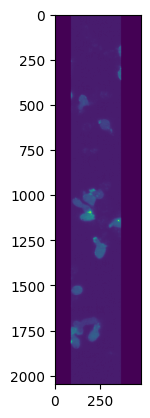

In [14]:
imshow(get_image(1))

## Trying to animate videos!

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import IPython
import IPython.display

%matplotlib notebook
num_frames = 241
frame_width = 475
frame_height = 2048
frames = np.random.random((num_frames, frame_width, frame_height))

# Create a function to update frames
def update(frame):
    plt.clf()  # Clear the previous frame
    plt.imshow(get_image(frame))
    plt.axis('off')  # Turn off axes
    plt.title(f'Frame {frame}')  # Add frame number as title

# Create the animation
fig = plt.figure()
ani = FuncAnimation(fig, update, frames=num_frames, interval=200)

plt.show()

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import HTML
HTML(ani.to_jshtml())


In [28]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

In [25]:
img = get_image(50, 100)

img.shape

[('S', 1), ('T', 1), ('C', 2), ('Z', 1), ('Y', 2048), ('X', 475)]


(2, 2048, 475)

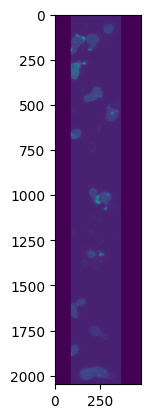

In [27]:
plt.imshow(img[0])

## Cell Segmentation

In [37]:
video

In [38]:
dims = video.get_dims_shape()[0]
dims

{'X': (0, 475),
 'Y': (0, 2048),
 'Z': (0, 114),
 'C': (0, 2),
 'T': (0, 241),
 'S': (0, 1)}

Documentation for cell pose:
https://cellpose.readthedocs.io/en/latest/outputs.html

In [ ]:
test_img = get_image(50, 100, channel=0)

In [ ]:
masks, flows, styles = models.CellposeModel(model_type='cyto3').eval(test_img,
                            diameter=None, channels=[0,0])

In [10]:
masks = np.load("pip3-06_processed_frame_masks_z50.npy")

In [11]:
num_cells_per_frame = []
for mask in masks:
    num_cells_per_frame.append(len(np.unique(mask)))

num_cells_per_frame

[20,
 20,
 18,
 19,
 21,
 20,
 17,
 18,
 16,
 21,
 23,
 24,
 18,
 16,
 26,
 25,
 24,
 25,
 26,
 23,
 19,
 25,
 21,
 22,
 21,
 21,
 23,
 29,
 31,
 25,
 29,
 23,
 26,
 29,
 26,
 18,
 25,
 22,
 21,
 27,
 22,
 19,
 23,
 22,
 21,
 18,
 15,
 16,
 21,
 16,
 20,
 25,
 30,
 21,
 18,
 21,
 19,
 23,
 26,
 25,
 21,
 26,
 22,
 17,
 21,
 23,
 22,
 22,
 26,
 22,
 22,
 25,
 22,
 19,
 23,
 18,
 29,
 24,
 22,
 22,
 25,
 28,
 27,
 26,
 18,
 21,
 22,
 17,
 16,
 21,
 22,
 25,
 19,
 24,
 18,
 22,
 16,
 17,
 23,
 16,
 17,
 22,
 16,
 15,
 19,
 17,
 18,
 18,
 21,
 22,
 23,
 18,
 18,
 19,
 19,
 20,
 16,
 18,
 15,
 16,
 17,
 17,
 13,
 13,
 9,
 15,
 13,
 14,
 16,
 17,
 21,
 20,
 23,
 19,
 14,
 21,
 20,
 19,
 18,
 18,
 16,
 20,
 20,
 16,
 21,
 15,
 20,
 16,
 13,
 14,
 17,
 13,
 17,
 14,
 13,
 12,
 11,
 9,
 14,
 15,
 21,
 17,
 16,
 24,
 20,
 25,
 20,
 18,
 20,
 22,
 24,
 23,
 20,
 26,
 15,
 18,
 14,
 17,
 16,
 17,
 17,
 10,
 19,
 19,
 17,
 20,
 22,
 18,
 18,
 20,
 18,
 20,
 19,
 23,
 22,
 22,
 19,
 15,
 15,
 16,
 1

In [82]:
masks[0].shape

(2048, 475)

## Experimenting with segmentation and bounding boxes

In [ ]:
num_cells_per_frame = []
masks = []
zplane = 50
for frame in range(dims['T'][-1]):
    img = get_image(frame, zplane)
    mask, flows, styles = models.CellposeModel(model_type='cyto3').eval(img,
                            diameter=None, channels=[0,0])
    masks.append(mask)
    num_cells = len(np.unique(mask))
    num_cells_per_frame.append(num_cells)

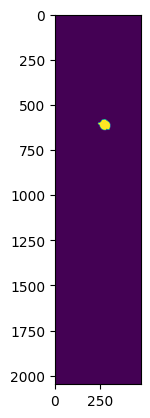

In [83]:
mask = masks[0]

imshow(mask==5)
plt.show()

### Bounding Boxes

In [23]:
binary = np.uint8((mask == 5) * 255)

In [58]:
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours[0][1:10,0]

array([[268, 584],
       [264, 584],
       [263, 585],
       [262, 585],
       [261, 586],
       [260, 586],
       [259, 587],
       [258, 587],
       [257, 588]], dtype=int32)

In [41]:
blank = np.zeros_like(binary)
for coord in contours[0]:
    x, y = coord[0, 0], coord[0,1]
    blank[y, x] = 1

In [53]:
x, y, w, h = cv2.boundingRect(contours[0])
x, y, w, h

(238, 583, 67, 59)

In [95]:
def draw_bounding_box(mask, cellID, padding=3, thickness=3):
    binary_array = (mask == cellID)
    # Convert binary array to binary image
    binary_image = np.uint8(binary_array * 255)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the bounding rectangle
    x, y, w, h = cv2.boundingRect(contours[0])
    
    # Apply padding
    x -= padding
    y -= padding
    w += 2 * padding
    h += 2 * padding
    
    # Draw bounding box
    bounding_box_image = cv2.rectangle(np.zeros_like(mask), (x, y), (x + w, y + h), cellID, thickness)
    
    return bounding_box_image, (x, y, w, h)

In [96]:
box, (x, y, w, h) = draw_bounding_box(mask, 5, padding=10)

In [98]:
x, y, w, h

(228, 573, 87, 79)

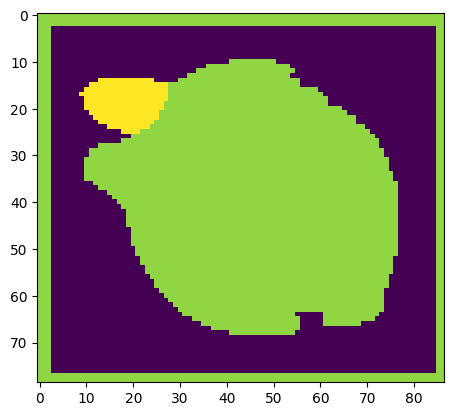

In [105]:
imshow((box+mask)[y:y+h, x:w+x])

In [59]:
#np.save("pip3-06_processed_frame_masks_z50.npy", masks)

In [78]:
frame50 = get_image(50)[0]

[('S', 1), ('T', 1), ('C', 2), ('Z', 1), ('Y', 2048), ('X', 475)]


In [104]:
np.sum(frame50[0] > 1000)

62

In [113]:
pixel_vals = pd.Series(frame50[0].flatten()).value_counts()

In [126]:
pixel_vals[pixel_vals.index > 313].sum()

9558

In [139]:
I = scale_img(frame50[0])

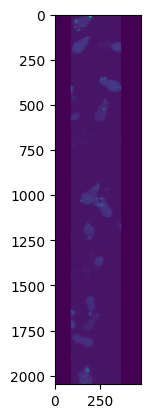

In [140]:
plt.imshow(frame50[0])

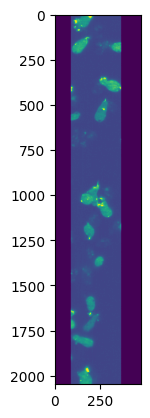

In [141]:
plt.imshow(I*255)

## Dataloader

In [68]:
class CziVideo:
    def __init__(self, fpath):
        self.file = fpath
        self.video = CziFile(fpath)
        self.dims = self.video.get_dims_shape()[0]

        self.num_frames = self.dims['T'][-1]
        self.num_zslices = self.dims['Z'][-1]
        print(f"Video with {self.num_frames} frames, {self.num_zslices} z slices")

        self.num_cells_per_frame = {}
        self.cell_masks = {}

    def get_plane(self, z_plane, scale=True):
        plane, shp = self.video.read_image(S=0, Z=z_plane, C=self.channel)
        if(scale):
            plane = self.scale_img(plane)

        return(plane.squeeze())
    
    def get_image(self, z_plane, timestep, channel=0, scale=True):
        timestep = timestep % self.num_frames
        z_plane = z_plane % self.num_zslices
        img, shp = self.video.read_image(S=0, Z=z_plane, T=timestep, C=channel)
        img = img.squeeze()
        if(scale):
            img = self.scale_img(img)
        return(img) # returns (channels, Y, X)

    def scale_img(self, img):
        lower_bound = np.percentile(img, 1)
        upper_bound = np.percentile(img, 99.9)
        I = (img - lower_bound) / (upper_bound - lower_bound)
        I = np.clip(I, 0, 1)
        return(I)

    def load_segmentation_masks(self, zplane=50, verbose=False):
        print(f"Loading segmentation masks for zplane {zplane}")
        num_cells = []
        cell_masks = []
        flows = []
        styles = []
        for frame in range(self.dims['T'][-1]):
            if(verbose):
                print(f"Computing for timestep {frame}")
            img = self.get_image(zplane, frame)
            mask, flow, style = models.CellposeModel(model_type='cyto3').eval(img,
                                    diameter=None, channels=[0,0])
            cell_masks.append(mask)
            flows.append(flow)
            styles.append(style)
            N = len(np.unique(masks))
            num_cells.append(N)

        self.num_cells_per_frame[zplane] = num_cells
        self.cell_masks[zplane] = {
            "masks" : np.array(cell_masks),
            "flows" : flows,
            "styles" : styles,
        }

    def calculate_bounding_boxes(self, zplane=50, verbose=False):
        print(self.cell_masks.keys(), zplane in self.cell_masks.keys())
        masks = self.cell_masks[zplane]['masks']
        bounding_boxes = {}
        for frame, num_cells_in_frame in enumerate(self.num_cells_per_frame[50]):
            mask = masks[frame]
            bounding_boxes[frame] = []
            for cell_id in range(num_cells_in_frame):
                if verbose:
                    print(f'Fetching cell {cell_id} from frame {frame}')
                binary = np.uint8((mask==cell_id) * 255)
                contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if(len(contours) == 0):
                    if(verbose):
                        print("contour not found")
                    
                else:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    x -= padding
                    y -= padding
                    w += 2 * padding
                    h += 2 * padding
                    bounding_boxes[frame].append((x, y, w, h))
        self.cell_masks[zplane]['boxes'] = bounding_boxes
        return(bounding_boxes)
            


    def find_bounding_box(self, mask, cellID, padding=3):
        binary_array = (mask == cellID)
        # Convert binary array to binary image
        binary_image = np.uint8(binary_array * 255)
        
        # Find contours
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        print(f"Contours size {len(contours)}")
        # Get the bounding rectangle
        x, y, w, h = cv2.boundingRect(contours[0])
        
        # Apply padding
        x -= padding
        y -= padding
        w += 2 * padding
        h += 2 * padding
        return(x, y, w, h)

    def draw_bounding_box(self, image, rec, value, thickness=3):
        # value is what pixel val want to put there
        x, y, w, h = rec
        # Draw bounding box over image
        bounding_box_image = cv2.rectangle(image, (x, y), (x + w, y + h), value, thickness)
        
        return bounding_box_image, (x, y, w, h)


    def get_cell_mask(self, zplane, frame, cell_num):
        if(len(self.cell_masks) > 0 and zplane in self.cell_masks.keys()):
            masks = self.cell_masks[zplane]["masks"]
            if(cell_num < self.num_cells_per_frame[zplane][frame]):
                print(f"Fetching mask for cell {cell_num} out of {self.num_cells_per_frame[zplane][frame]} cells in frame")
                return(masks[frame] == cell_num)
            else:
                print(f"Requested cell id {cell_num} out of range. This frame has only {self.num_cells_per_frame[zplane][frame]} cells")
                return(-1)
        else:
            print("This zplane has not loaded masks yet. Try running load_segmentation_masks(zplane) first!")
            return(-1)



In [69]:
czi = CziVideo(fname)
czi.cell_masks[50] = {"masks" : masks}
czi.num_cells_per_frame[50] = num_cells_per_frame

Video with 241 frames, 114 z slices


In [70]:
czi.cell_masks[50]['masks'].shape

(241, 2048, 475)

In [71]:
boxes = czi.calculate_bounding_boxes(50, verbose=True)

dict_keys([50]) True
Fetching cell 0 from frame 0
Contours size 12
Fetching cell 1 from frame 0
Contours size 1
Fetching cell 2 from frame 0
Contours size 0


IndexError: tuple index out of range

Fetching mask for cell 10 out of 19 cells in frame


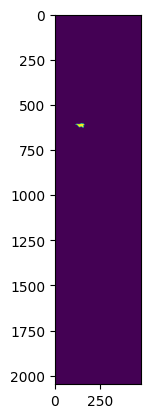

In [41]:
plt.imshow(czi.get_cell_mask(50, 20, 10))

In [40]:
czi.get_image(50, 20, True).max()

1.0

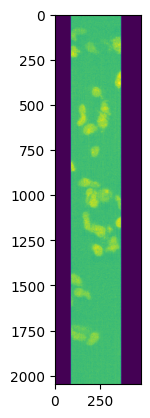

In [34]:
plt.imshow()

In [16]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

class CziVideoDataset(Dataset):
    def __init__(self, fpath, frame_split=[16,16], channel=-1):
        
        self.video = CziVideo(fpath)
        
        self.patches_per_frame = frame_split[0] * frame_split[1]
        self.grid_size = frame_split
        #self.frames = data[:,channel, :, :].astype(np.float32)
        #self.frame_tensors = torch.tensor(self.frames, dtype=torch.float32).clone().detach()

        self.num_cells_per_frame = {}
        self.cell_masks = {}    

    def __len__(self):
        # THIS MIGHT NOT BE TRUE
        # reasoning is that if 10 frames, trigram model, first frame possible is 8. (8,9), 10
        return((len(self.frames) - self.n + 1) * self.patches_per_frame)

    def __getitem__(self, idx):
        # indexes at max max-n frames
        first_frame = idx//self.patches_per_frame
        patch_index = idx%self.patches_per_frame
        print(f"first frame at {first_frame}, patch {patch_index}")
        if(self.n>0):
            Xs = []
            for i in range(self.n-1):
                patch = self.get_patch(first_frame+i, patch_index)
                print(patch.shape)
                Xs.append(patch)
            X = torch.cat(Xs, dim=0)
            print(X.shape)
            y = self.get_patch(first_frame + self.n - 1, patch_index)
            return(torch.flatten(X), torch.flatten(y))
        else:
            raise NotImplementedError

    def get_patch(self, frame_index, patch):
        arr = self.frame_tensors[frame_index]
        assert patch < self.patches_per_frame, "Patch index out of range"
        height, width = arr.shape
        #print(height, width)
        row_size, col_size = int(height / self.grid_size[0]), int(width/self.grid_size[1])
        patch_row, patch_col = int(patch/self.grid_size[1]), patch%self.grid_size[1] # [0 1 2; 3 4 5; 6 7 8]
        #print(f"Row {patch_row}, ({row_size}px), Col {patch_col}, ({col_size}px)")
        return(arr[row_size*patch_row:row_size*(patch_row+1), col_size*patch_col:col_size*(patch_col+1)])

    def reshape_flattened(self, flattened_patch):
        # turn input flattened vector back into frames for viewing (heightxwidthxnum_frames)
        frame_height, frame_width = self.frames[0].shape
        patch_height, patch_width = frame_height // self.grid_size[0], frame_width // self.grid_size[1]
        return(flattened_patch.reshape([patch_height, patch_width, -1]))



NameError: name 'Dataset' is not defined

In [157]:
fname

'../dicty_factin_pip3-06_processed.czi'

In [181]:
ds = CziVideoDataset(fname, frame_split=[16, 4], channel=0)

Video with 241 frames, 114 z slices


Fetching mask for cell 2 out of 29 cells in frame


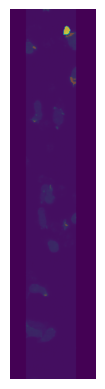

In [191]:
img = ds.get_image(50, 20)
plt.figure()
plt.imshow(img)
plt.imshow(ds.get_cell_mask(50, 30, 2), alpha=0.7)
plt.axis('off')

plt.show()

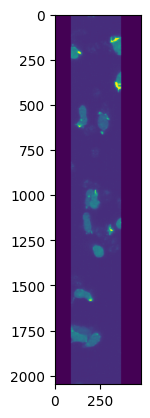

In [193]:
plt.imshow(img)

Fetching mask for cell 2 out of 19 cells in frame


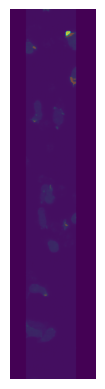

In [194]:
img = ds.get_image(50, 20)
plt.figure()
plt.imshow(img)
plt.imshow(ds.get_cell_mask(50, 20, 2), alpha=0.7)
plt.axis('off')

plt.show()

In [178]:
num_cells_per_frame[30]

29

In [ ]:
X, y = getitem(ds, 4)

first frame at 0, patch 4
torch.Size([128, 281])
torch.Size([128, 281])
torch.Size([256, 281])


In [ ]:
len(ds)

14144

In [ ]:
X.reshape([128, 281, -1]).shape

torch.Size([128, 281, 2])

In [ ]:
dataloader = DataLoader(ds, batch_size=16, shuffle=True)

In [ ]:
ds[10].shape

frame 0, patch 10


torch.Size([35968])

### Saving Videos

In [ ]:
def save_as_video(self, output_path):
    s = time.time()
    # Define the video codec and frames per second (fps)
    height, width = self.frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    fps = 30
    # Create a VideoWriter object
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height), isColor=False)
    for frame in self.frames:
        video_writer.write(frame)
    video_writer.release()

    print(f"Video saved to: {output_path} in {time.time() - s} seconds")

def save2(self, fname):
    fps = 30
    # Write frames to the video file
    with imageio.get_writer(fname, fps=fps) as writer:
        for frame in self.frames:
            writer.append_data(frame)
    print(f"Video saved to: {fname} in {time.time() - s} seconds")

In [ ]:
fpath = "test.mp4"
fps = 30
with imageio.get_writer(fpath) as writer:
    writer.fps = fps  # Set the frame rate
    for frame in ds.frames[:10]:
        writer.append_data(frame)


## Computing Optical Flow

In [22]:
## Importing the necessary modules
import numpy as np
import os
import skimage.io as io
from natsort import natsorted
from tqdm import tqdm
import scipy as sp
import time
import scipy.io as sio
#import hdf5storage
from multiprocessing import TimeoutError
from multiprocessing.pool import ThreadPool as Pool
from functools import partial
import matplotlib.pyplot as plt
from aicspylibczi import CziFile
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Load Data

# Folder address where the raw 3D movie is
data_folder = 'E:\\Spandan\\3D_Lattice_Lightsheet\\Shen 1-30-23\\dicty_factin_pip3-06_processed'
czi_path = data_folder +'\\dicty_factin_pip3-06_processed.czi'

input_img = CziFile(czi_path)
shape = input_img.size; dims = input_img.dims;  # Check shape of the data
print(shape), print(dims)

num_timepoints, num_stacks, height, width = shape[1], shape[3], shape[4], shape[5]

In [ ]:
def smoothing(k, img):

    def pre_processing(frm_id, image, ch_id):
        img_temp = image.read_image(T=frm_id, C=ch_id)
        imge = np.squeeze(img_temp[0])
        return imge

    current_frame = pre_processing(k, img, channel)

    if k == start_frame or k == end_frame - jump:
        result = current_frame
    else:
        previous_frame = pre_processing(k - jump, img, channel)
        next_frame = pre_processing(k + jump, img, channel)

        if k == start_frame + jump or k == end_frame - 2*jump:
            result = np.average([previous_frame, current_frame, next_frame], weights=kernel1, axis=0)

        else:
            frame_minus_2_jump = pre_processing(k - 2 * jump, img, channel)
            frame_plus_2_jump = pre_processing(k + 2 * jump, img, channel)
            result = np.average([frame_minus_2_jump, previous_frame, current_frame, next_frame, frame_plus_2_jump], weights=kernel2, axis=0)

    result = result.astype(np.float32)
    np.save(os.path.join(data_folder, 'smoothed_frames', f'{k}'), result)

# Example usage:
jump = 1
start_frame = 0
end_frame = num_timepoints
channel = 0
# Create a local folder for storing smoothed frames
os.makedirs(os.path.join(data_folder, 'smoothed_frames'), exist_ok=True)

In [ ]:
kernel1 = np.array([0.225,0.55,0.225]);
kernel2 = np.array([0.036,0.249,0.431,0.249,0.036])

numProcessors = 16   # maybe change it to 8 (but that's it!)
pool = Pool(processes=numProcessors)

print('Post-processing in parallel with '+str(numProcessors)+' processors')

#store start time
stopwatchStart = time.time()
[temp] =zip(*pool.map(partial(smoothing, img = input_img), range(num_timepoints-1)))

print('Wall time = '+str(np.round(time.time() - stopwatchStart,2))+' s')

print('Parallel post processing complete, switching to serial')
pool.close()

In [ ]:
# Lucas-Kanade method for Optical Flow
# INPUTS:

#k: Timeframe index, input_image: temporally smoothed movie
#sig: Spread of the Gaussian weights around a pixel, #thresh: Threshold for reliability score

# OUTPUTS (stored in a data file):
#vx: x-velocity, vy: y-velocity, vz: z-velocity
#reliabMat: reliability score for velocities calculated at a pixel (higher the better)

def LKxOptFlow(k,sig,thresh):

    def reliability_from_cubic_roots(a,b,c,d,e,f):
        trA = a + b + c;
        q = trA/3;
        x = (a + b - 2*c)**2/9 + (a -2*b + c)**2/9 + (b - 2*a + c)**2/9 + 2*(d**2 + e**2 + f**2);
        p = np.sqrt(x/6)
        detB = ((a-q)*(b-q)*(c-q) + 2*d*e*f - (a-q)*f**2 - (b-q)*e**2 - (c-q)*d**2)/(p**3)
        detB[detB > 2] = 2;
        detB[detB < -2] = -2;

        theta = np.arccos(detB/2)/3

        # define roots
        r1 = 2*np.cos(theta);
        r2 = 2*np.cos(theta + 2*np.pi/3);
        r3 = 2*np.cos(theta + 4*np.pi/3);

        # define eigs
        b1 = r1*p + q;
        b2 = r2*p + q;
        b3 = r3*p + q;

        # define reliability
        rel = np.stack((b1,b2,b3), axis=3)
        rel = np.min(rel, axis=3)
        return rel


    current_frame = np.load(smooth_address+'\\{}.npy'.format(k))             # Load temporally smoothed frame-1
    next_frame = np.load(smooth_address+'\\{}.npy'.format(k+1))         # Load temporally smoothed frame-2

    # Calculating the spatial and temporal gradients assuming the input frame is of the shape (ZYX)

    dy = np.gradient(current_frame,axis=1,edge_order=1)
    dx = np.gradient(current_frame,axis=2,edge_order=1)
    dz = np.gradient(current_frame,axis=0,edge_order=1)
    dt = next_frame - current_frame

    dz = dz.astype(np.float32); dy = dy.astype(np.float32); dx = dx.astype(np.float32); dt = dt.astype(np.float32);

    wdx2 = sp.ndimage.gaussian_filter(dx**2, sig, mode='nearest')
    wdy2 = sp.ndimage.gaussian_filter(dy**2, sig, mode='nearest')
    wdz2 = sp.ndimage.gaussian_filter(dz**2, sig, mode='nearest')

    wdxy = sp.ndimage.gaussian_filter(dx*dy, sig, mode='nearest')
    wdxz = sp.ndimage.gaussian_filter(dx*dz, sig, mode='nearest')
    wdyz = sp.ndimage.gaussian_filter(dy*dz, sig, mode='nearest')

    wdtx = sp.ndimage.gaussian_filter(dx*dt, sig, mode='nearest')
    wdty = sp.ndimage.gaussian_filter(dy*dt, sig, mode='nearest')
    wdtz = sp.ndimage.gaussian_filter(dz*dt, sig, mode='nearest')

    # Calculate Flow
    eps = 1e-6
    determinant = wdx2*wdy2*wdz2 + 2*wdxy*wdyz*wdxz - wdx2*(wdyz**2) - wdy2*(wdxz**2) - wdz2*(wdxy**2)

    vx = -((determinant + eps)**(-1))* ( \
              wdtx*(wdy2*wdz2 - wdyz**2) \
            + wdty*(wdxz*wdyz - wdxy*wdz2) \
            + wdtz*(wdxy*wdyz - wdxz*wdy2) );
    vy = -((determinant + eps)**(-1))* ( \
              wdtx*(wdxz*wdyz - wdxy*wdz2) \
            + wdty*(wdx2*wdz2 - wdxz**2) \
            + wdtz*(wdxy*wdxz - wdx2*wdyz) );
    vz = -((determinant + eps)**(-1))* ( \
              wdtx*(wdxy*wdyz - wdxz*wdy2) \
            + wdty*(wdxy*wdxz - wdx2*wdyz) \
            + wdtz*(wdx2*wdy2 - wdxy**2) );
    reliabMat = reliability_from_cubic_roots(wdx2,wdy2,wdz2,wdxy,wdxz,wdyz)

    vx = vx*(reliabMat > thresh);
    vy = vy*(reliabMat > thresh);
    vz = vz*(reliabMat > thresh);

#     np.savez(save_path+'/{}.npz'.format(k),vx = vx,vy = vy,rel=reliabMat)   # to save as numpy data files
    sio.savemat(save_path+'\\{}.mat'.format(k),{'vx':vx,'vy':vy,'vz':vz,'rel':reliabMat},do_compression=False) # to save as .MAT files
    return [0]

In [ ]:
# Example usage:

data_folder = 'E:\\Spandan\\3D_Lattice_Lightsheet\\Shen 1-30-23\\dicty_factin_pip3-06_processed'   # Root address where all the images are stored
smooth_address = data_folder+'\\smoothed_frames'
save_path = data_folder+'\\Op_flow_threaded'                 # Create a local folder for storing OF results
os.makedirs(save_path,exist_ok=True)

file_list = natsorted(os.listdir(smooth_address))    # sort the image files numerically by frame-index
n_frames = len(file_list);

In [ ]:
numProcessors = 16   # maybe change it to 8 (but that's it)
pool = Pool(processes=numProcessors)

print('Post-processing in parallel with '+str(numProcessors)+' processors')

#store start time
stopwatchStart = time.time()
[temp] =zip(*pool.map(partial(LKxOptFlow, sig = 2, thresh = 0.1), range(n_frames-1)))

print('Wall time = '+str(np.round(time.time() - stopwatchStart,2))+' s')

print('Parallel post processing complete, switching to serial')
pool.close()